In [2]:
pip install osmnx networkx matplotlib geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 1.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm

In [5]:
# Define the location
place_name = "Hanoi, Vietnam"
# Download the drivable road network as a graph
G = ox.graph_from_place(place_name, network_type='drive')
# Convert to undirected graph for analysis
G_undirected = G.to_undirected()

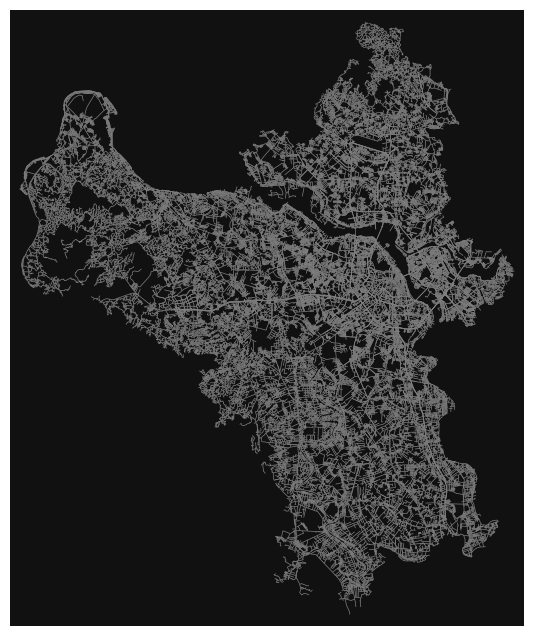

In [6]:
fig, ax = ox.plot_graph(G_undirected, node_size=0, edge_color="gray", edge_linewidth=0.5)

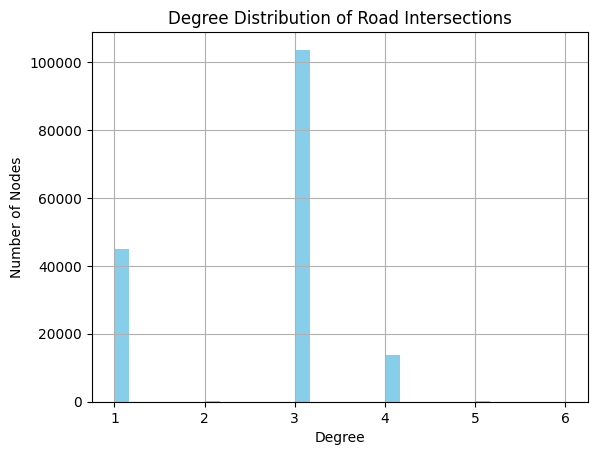

In [7]:
# Compute degrees and plot histogram
degrees = [val for (node, val) in G_undirected.degree()]
plt.hist(degrees, bins=30, color='skyblue')
plt.title("Degree Distribution of Road Intersections")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()

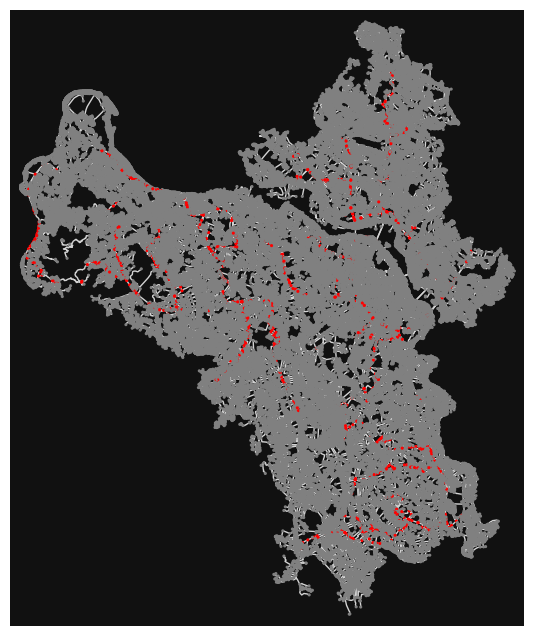

In [8]:
# Approximate centrality using a sample of nodes
centrality = nx.betweenness_centrality(G_undirected, k=100, normalized=True)
# Highlight top 1% most central nodes
threshold = sorted(centrality.values(), reverse=True)[int(0.01 * len(centrality))]
important_nodes = [n for n, c in centrality.items() if c >= threshold]
# Color nodes: red = central, gray = others
nc = ['red' if node in important_nodes else 'gray' for node in G_undirected.nodes()]
fig, ax = ox.plot_graph(G_undirected, node_color=nc, node_size=5, edge_color='lightgray')

/var/folders/88/q7q87fx549763mq0p56wt9qc0000gn/T/ipykernel_21202/3272931486.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_coms)(color_map)


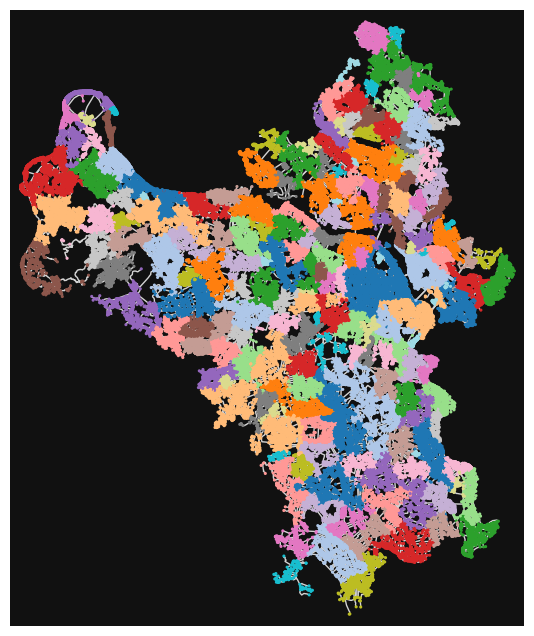

In [9]:
# Apply greedy modularity-based community detection
communities = list(greedy_modularity_communities(G_undirected))
# Map node to its community index
node_community_map = {}
for i, com in enumerate(communities):
 for node in com:
  node_community_map[node] = i
# Convert community index to RGB color using colormap
color_map = [node_community_map[node] for node in G_undirected.nodes()]
num_coms = len(set(color_map))
colors = cm.get_cmap('tab20', num_coms)(color_map)
# Visualize communities on map
fig, ax = ox.plot_graph(G_undirected, node_color=colors, node_size=5,
edge_color='lightgray')

In [10]:
ox.io.save_graph_geopackage(G, filepath="hanoi_network.gpkg")

In [11]:
ox.io.save_graphml(G, filepath="hanoi_network.graphml")

--- Phân tích lớp 'edges' (các con đường) ---
Tổng số con đường (cạnh): 206482
5 dòng đầu tiên của dữ liệu các con đường:
          u           v  key      osmid      highway  oneway reversed  \
0  84806187  5710236733    0  600537341  residential   False     True   
1  84806187    84806193    0  179477523      primary   False     True   
2  84806187  4023430891    0  179477523      primary   False    False   
3  84806193   440776411    0  179477523      primary   False     True   
4  84806193  5710236730    0  600537332  residential   False    False   

       length        from        to  ...                name maxspeed ref  \
0   45.450061  5710236733  84806187  ...                                    
1  261.851978    84806193  84806187  ...  Đường Nguyễn Khoái                
2  321.503813  4023430891  84806187  ...  Đường Nguyễn Khoái                
3   30.593061   440776411  84806193  ...  Đường Nguyễn Khoái                
4   64.294303  5710236730  84806193  ...              

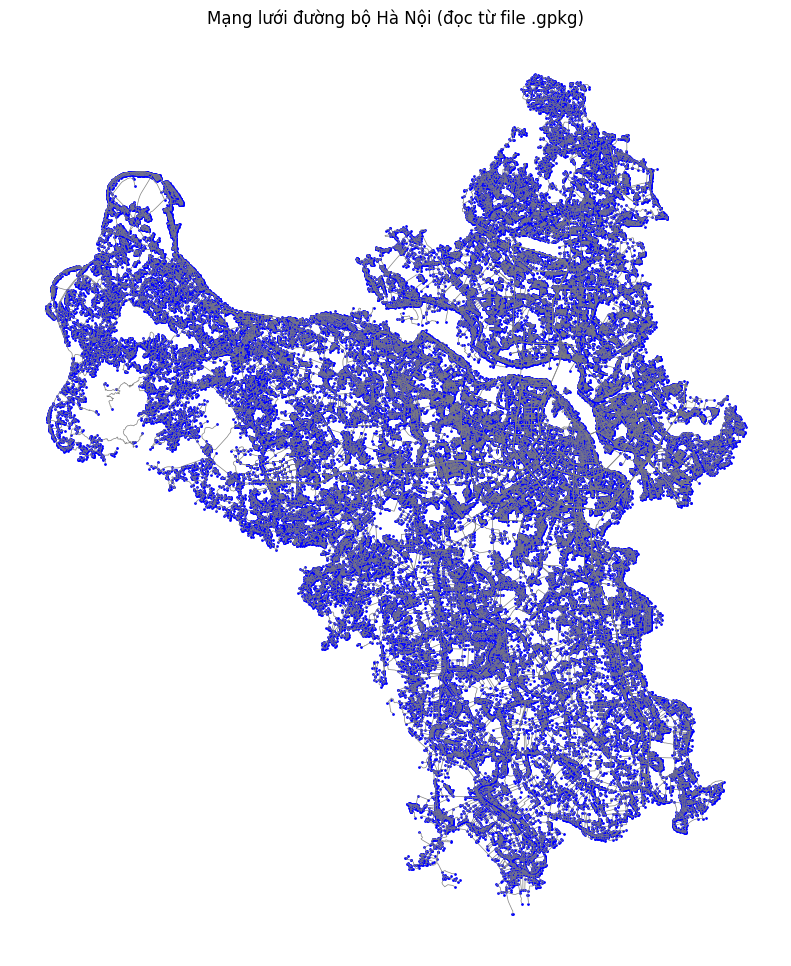

In [12]:
# Import geopandas để phân tích dữ liệu không gian
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Phân tích file GeoPackage bằng Python ---

# Đường dẫn tới file đã lưu
gpkg_path = "hanoi_network.gpkg"

# Đọc lớp (layer) 'edges' (các con đường)
print("--- Phân tích lớp 'edges' (các con đường) ---")
try:
    edges = gpd.read_file(gpkg_path, layer='edges')
    print(f"Tổng số con đường (cạnh): {len(edges)}")
    print("5 dòng đầu tiên của dữ liệu các con đường:")
    print(edges.head())
    print("\\n")

    # Thống kê các loại đường (highway)
    if 'highway' in edges.columns:
        print("Thống kê các loại đường:")
        highway_counts = edges['highway'].value_counts()
        print(highway_counts)
    print("\\n")

    # Đọc lớp (layer) 'nodes' (các nút giao)
    print("--- Phân tích lớp 'nodes' (các nút giao) ---")
    nodes = gpd.read_file(gpkg_path, layer='nodes')
    print(f"Tổng số nút giao: {len(nodes)}")
    print("5 dòng đầu tiên của dữ liệu các nút giao:")
    print(nodes.head())
    print("\\n")

    # --- Trực quan hóa lại bằng GeoPandas ---
    print("Đang vẽ lại bản đồ từ file GeoPackage...")

    # Tạo một biểu đồ
    fig, ax = plt.subplots(figsize=(12, 12))

    # Vẽ các con đường trước
    edges.plot(ax=ax, linewidth=0.5, color='gray')

    # Vẽ các nút giao lên trên
    nodes.plot(ax=ax, markersize=1, color='blue')

    ax.set_title("Mạng lưới đường bộ Hà Nội (đọc từ file .gpkg)")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file GeoPackage: {e}")
    print("Hãy chắc chắn rằng các ô code trước đó đã chạy thành công và file 'hanoi_network.gpkg' đã được tạo.")


## Phân tích Nâng cao: Centrality, Community và Layout

Bên cạnh các phân tích cơ bản, chúng ta có thể khám phá sâu hơn cấu trúc của mạng lưới bằng các thuật toán nâng cao.

1.  **Centrality (Độ trung tâm):**
    *   **Degree Centrality:** Đo lường số lượng kết nối trực tiếp của một nút. Nút có bậc cao là những trung tâm kết nối cục bộ.
    *   **Closeness Centrality:** Đo lường mức độ "gần" của một nút với tất cả các nút khác. Nút có closeness centrality cao có thể lan truyền thông tin nhanh nhất trong mạng lưới.
    *   Chúng ta sẽ tính toán và trực quan hóa các độ đo này để so sánh với Betweenness Centrality.

2.  **Community Detection (Phát hiện Cộng đồng):**
    *   **Louvain Method:** Một thuật toán phổ biến và hiệu quả khác để phát hiện cộng đồng, dựa trên việc tối ưu hóa modularity. Chúng ta sẽ so sánh kết quả của Louvain với thuật toán Greedy đã dùng trước đó.

3.  **Graph Layout (Bố cục Đồ thị):**
    *   **Topological Layouts (e.g., Spring Layout):** Thay vì hiển thị các nút theo vị trí địa lý thực tế, các thuật toán layout này sắp xếp các nút dựa trên cấu trúc liên kết của chúng. Điều này giúp làm lộ rõ cấu trúc cộng đồng và các mối quan hệ topo của mạng lưới mà không bị ảnh hưởng bởi vị trí địa lý.

In [1]:
# --- 1. Phân tích Centrality nâng cao ---
print("--- Tính toán các độ đo Centrality khác ---")

# Degree Centrality
degree_centrality = nx.degree_centrality(G_undirected)
# Closeness Centrality (có thể chạy chậm trên đồ thị lớn, nên dùng mẫu)
# Lấy một đồ thị con để tính toán nhanh hơn
nodes_sample = list(G_undirected.nodes())[::10] # Lấy 1/10 số nút
subgraph = G_undirected.subgraph(nodes_sample)
closeness_centrality = nx.closeness_centrality(subgraph)

# Trực quan hóa Degree Centrality
print("Trực quan hóa Degree Centrality...")
dc_values = list(degree_centrality.values())
nc_dc = ox.plot.get_node_colors_by_attr(G_undirected, 'degree_centrality', cmap='viridis', num_bins=20)
fig, ax = ox.plot_graph(G_undirected, node_color=nc_dc, node_size=5, edge_color='lightgray',
                        bgcolor='k', show=False, close=False)
ax.set_title("Degree Centrality")
plt.show()

# --- 2. Phát hiện cộng đồng bằng thuật toán Louvain ---
print("\\n--- Phát hiện cộng đồng bằng thuật toán Louvain ---")
# Cần cài đặt thư viện python-louvain: !pip install python-louvain
import community as community_louvain

partition = community_louvain.best_partition(G_undirected)
num_communities = len(set(partition.values()))
print(f"Tìm thấy {num_communities} cộng đồng bằng thuật toán Louvain.")

# Trực quan hóa cộng đồng Louvain
louvain_colors = [partition[node] for node in G_undirected.nodes()]
fig, ax = ox.plot_graph(G_undirected, node_color=louvain_colors, node_size=5,
                        edge_color='lightgray', cmap='tab20', show=False, close=False)
ax.set_title("Cộng đồng phát hiện bằng Louvain (theo vị trí địa lý)")
plt.show()


# --- 3. Trực quan hóa bằng Graph Layout (Spring Layout) ---
print("\\n--- Trực quan hóa bằng Spring Layout để xem cấu trúc topo ---")
# Tính toán vị trí các nút bằng spring_layout
# Chạy trên đồ thị con để nhanh hơn và dễ nhìn hơn
pos = nx.spring_layout(subgraph, seed=42)

# Vẽ đồ thị với layout mới
plt.figure(figsize=(12, 12))
# Lấy màu cộng đồng cho đồ thị con
subgraph_louvain_colors = [partition[node] for node in subgraph.nodes()]
nx.draw(subgraph, pos, with_labels=False, node_size=10,
        node_color=subgraph_louvain_colors, cmap='tab20', width=0.5)
plt.title("Cấu trúc mạng lưới (Spring Layout) với màu cộng đồng Louvain")
plt.show()


--- Tính toán các độ đo Centrality khác ---


NameError: name 'nx' is not defined